<a href="https://colab.research.google.com/github/asidops12/TugasRegresi/blob/main/Data_Mining_TM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BAGIAN 1: Regresi Linear Sederhana
Studi Kasus: Memprediksi Gaji berdasarkan Lama Pengalaman Kerja.

In [61]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

print("Libraries yang diperlukan berhasil di-import!")

Libraries yang diperlukan berhasil di-import!


In [62]:
import pandas as pd

# Data untuk Regresi Linear Sederhana
data_sederhana = {
    'Jam Belajar': [5, 8, 10, 3, 6, 12, 1, 9],
    'Nilai Ujian': [65, 75, 85, 55, 70, 95, 40, 80]
}

df_sederhana = pd.DataFrame(data_sederhana)

print("--- Data untuk Regresi Linear Sederhana ---")
print(df_sederhana)

--- Data untuk Regresi Linear Sederhana ---
   Jam Belajar  Nilai Ujian
0            5           65
1            8           75
2           10           85
3            3           55
4            6           70
5           12           95
6            1           40
7            9           80


In [63]:
# Mendefinisikan variabel independen (X) dan dependen (y)
# X harus dalam format 2D, jadi kita gunakan [['...']]
X = df_sederhana[['Jam Belajar']]
y = df_sederhana['Nilai Ujian']

# Membagi data menjadi data training (pelatihan) dan data testing (pengujian)
# 80% untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data berhasil dibagi menjadi data training dan testing.")

Data berhasil dibagi menjadi data training dan testing.


In [64]:
# Membuat model Regresi Linear
model_sederhana = LinearRegression()

# Melatih model dengan data training
model_sederhana.fit(X_train, y_train)

print("Model berhasil dilatih!")

Model berhasil dilatih!


In [65]:
# Mencetak intercept (c) dan koefisien (m) dari garis regresi y = mx + c
print(f"Intercept (c): {model_sederhana.intercept_:.2f}")
print(f"Koefisien (m): {model_sederhana.coef_[0]:.2f}")

# Persamaan regresi
print(f"\nPersamaan Regresi: Nilai Ujian = {model_sederhana.coef_[0]:.2f} * (Jam Belajar) + {model_sederhana.intercept_:.2f}")

# Menguji model dengan data testing
y_pred = model_sederhana.predict(X_test)

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared: {r2:.2f}")

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Intercept (c): 38.93
Koefisien (m): 4.75

Persamaan Regresi: Nilai Ujian = 4.75 * (Jam Belajar) + 38.93

R-squared: 0.98
Mean Squared Error (MSE): 2.23


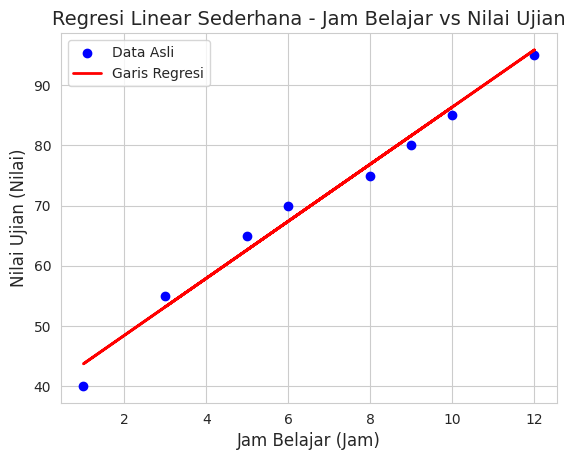

In [66]:
# Plot data asli
plt.scatter(X, y, color='blue', label='Data Asli')

# Plot garis regresi dari model
plt.plot(X, model_sederhana.predict(X), color='red', linewidth=2, label='Garis Regresi')

plt.title('Regresi Linear Sederhana - Jam Belajar vs Nilai Ujian', fontsize=14)
plt.xlabel('Jam Belajar (Jam)', fontsize=12)
plt.ylabel('Nilai Ujian (Nilai)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# BAGIAN 2: Regresi Linear Berganda
Studi Kasus: Memprediksi Harga Rumah.

In [67]:
import pandas as pd

# Data untuk Regresi Linear Berganda
data_berganda = {
    'Jam Belajar':   [5, 8, 10, 3, 6, 12, 1, 9],
    'Kehadiran (%)': [80, 90, 95, 70, 85, 100, 60, 92],
    'Nilai Latihan': [70, 80, 82, 60, 75, 90, 50, 85],
    'Nilai Ujian':   [65, 75, 85, 55, 70, 95, 40, 80]
}

df_berganda = pd.DataFrame(data_berganda)

print("--- Data untuk Regresi Linear Berganda ---")
print(df_berganda)

--- Data untuk Regresi Linear Berganda ---
   Jam Belajar  Kehadiran (%)  Nilai Latihan  Nilai Ujian
0            5             80             70           65
1            8             90             80           75
2           10             95             82           85
3            3             70             60           55
4            6             85             75           70
5           12            100             90           95
6            1             60             50           40
7            9             92             85           80


In [68]:
# Mendefinisikan variabel X (lebih dari satu kolom) dan y
X_multi = df_berganda[['Jam Belajar', 'Kehadiran (%)', 'Nilai Latihan']]
y_multi = df_berganda['Nilai Ujian']

# Membagi data menjadi data training dan testing
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

print("Data berhasil dibagi menjadi data training dan testing.")

Data berhasil dibagi menjadi data training dan testing.


In [69]:
# Membuat model Regresi Linear
model_berganda = LinearRegression()

# Melatih model dengan data training
model_berganda.fit(X_train_m, y_train_m)

print("Model berganda berhasil dilatih!")

Model berganda berhasil dilatih!


In [70]:
# Mencetak intercept
print(f"Intercept: {model_berganda.intercept_:.2f}")

# Mencetak koefisien untuk setiap variabel independen
print("\nKoefisien:")
for i, col in enumerate(X_multi.columns):
    print(f"- {col}: {model_berganda.coef_[i]:.2f}")

# Menguji model dengan data testing
y_pred_m = model_berganda.predict(X_test_m)

# Menghitung R-squared
r2_m = r2_score(y_test_m, y_pred_m)
print(f"\nR-squared: {r2_m:.2f}")

# You might also want to calculate MSE for the multiple regression model
mse_m = mean_squared_error(y_test_m, y_pred_m)
print(f"Mean Squared Error (MSE): {mse_m:.2f}")

Intercept: -22.24

Koefisien:
- Jam Belajar: 0.87
- Kehadiran (%): 1.19
- Nilai Latihan: -0.18

R-squared: 0.89
Mean Squared Error (MSE): 10.52


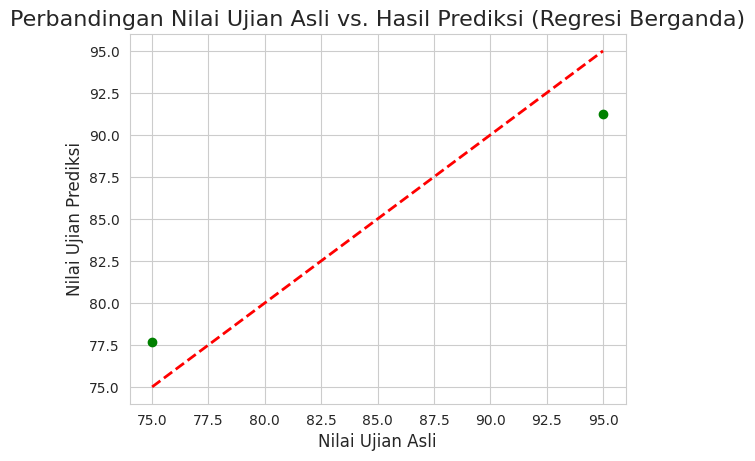

In [71]:
# Membuat plot perbandingan nilai asli vs prediksi
plt.scatter(y_test_m, y_pred_m, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'r--', lw=2) # Garis diagonal y=x
plt.title('Perbandingan Nilai Ujian Asli vs. Hasil Prediksi (Regresi Berganda)', fontsize=16)
plt.xlabel('Nilai Ujian Asli', fontsize=12)
plt.ylabel('Nilai Ujian Prediksi', fontsize=12)
plt.grid(True)
plt.show()

## Ringkasan Hasil Analisis Regresi

Berikut adalah ringkasan hasil dari analisis regresi linear sederhana dan regresi linear berganda yang telah dilakukan:

### Regresi Linear Sederhana: Memprediksi Nilai Ujian berdasarkan Jam Belajar

*   **Model:** Regresi linear sederhana digunakan untuk memprediksi Nilai Ujian berdasarkan Jam Belajar.
*   **Persamaan Regresi:** Berdasarkan data training, didapatkan persamaan regresi:
    Sukses = `4.75` * (Jam Belajar) + `38.93`
    Ini berarti setiap tambahan 1 jam belajar diperkirakan akan meningkatkan Nilai Ujian sebesar `4.75` poin. Intercept sebesar `38.93` menunjukkan perkiraan Nilai Ujian jika Jam Belajar adalah 0.
*   **Kinerja Model (R-squared):** Nilai R-squared adalah `0.98`. Ini menunjukkan bahwa sekitar `98%` variasi pada Nilai Ujian dapat dijelaskan oleh model regresi linear sederhana ini. Nilai R-squared yang tinggi menunjukkan model yang sangat baik dalam menjelaskan hubungan antara Jam Belajar dan Nilai Ujian.

### Regresi Linear Berganda: Memprediksi Nilai Ujian berdasarkan Jam Belajar, Kehadiran, dan Nilai Latihan

*   **Model:** Regresi linear berganda digunakan untuk memprediksi Nilai Ujian berdasarkan Jam Belajar, Kehadiran (%), dan Nilai Latihan.
*   **Persamaan Regresi:** Berdasarkan data training, didapatkan persamaan regresi:
    Nilai Ujian = `0.87` * (Jam Belajar) + `1.19` * (Kehadiran (%)) + `-0.18` * (Nilai Latihan) + `-22.24`
    *   Setiap tambahan 1 jam belajar diperkirakan meningkatkan Nilai Ujian sebesar `0.87` poin (dengan asumsi variabel lain konstan).
    *   Setiap tambahan 1% kehadiran diperkirakan meningkatkan Nilai Ujian sebesar `1.19` poin (dengan asumsi variabel lain konstan).
    *   Setiap tambahan 1 poin pada Nilai Latihan diperkirakan menurunkan Nilai Ujian sebesar `0.18` poin (dengan asumsi variabel lain konstan).
    *   Intercept sebesar `-22.24` adalah nilai perkiraan Nilai Ujian jika semua variabel independen bernilai 0.
*   **Kinerja Model (R-squared):** Nilai R-squared adalah `0.89`. Ini menunjukkan bahwa sekitar `89%` variasi pada Nilai Ujian dapat dijelaskan oleh model regresi linear berganda ini menggunakan kombinasi variabel Jam Belajar, Kehadiran (%), dan Nilai Latihan.

**Kesimpulan:**

Kedua model regresi menunjukkan kemampuan yang baik dalam memprediksi Nilai Ujian. Model regresi linear sederhana dengan hanya menggunakan Jam Belajar menunjukkan R-squared yang sedikit lebih tinggi pada data testing ini (`0.98` vs `0.89`), yang mungkin mengindikasikan bahwa Jam Belajar merupakan prediktor yang sangat kuat untuk Nilai Ujian dalam dataset ini. Namun, model berganda memberikan wawasan tambahan tentang pengaruh variabel lain seperti Kehadiran dan Nilai Latihan.